In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [121]:
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons, load_digits

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [99]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm

from sklearn.tree import export_graphviz
import graphviz 

# 1. Decision Tree

+ 일련의 질문에 근거하여 주어진 데이터를 분류하는 알고리즘
+ 설명하기 좋은 알고리즘
+ 과적합 문제
+ 전처리가 거의 필요없다.(표준화, 정규화, Scaling)
+ 균일도 측정 방식
    - entropy를 이용한 Information Gain 지수(ID3알고리즘)
    - gini 계수 : 0(평등) -> 1(불평등)


+ Graphviz
    - http://www.graphviz.org 에서 프로그램 다운로드 및 설치
        - jupyter notebook 재실행
        
    - pip install graphviz

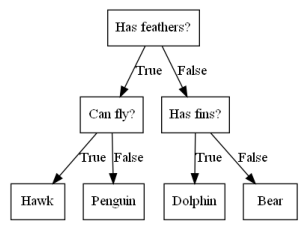

In [4]:
import os
os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\Graphviz\bin"

mglearn.plots.plot_animal_tree()

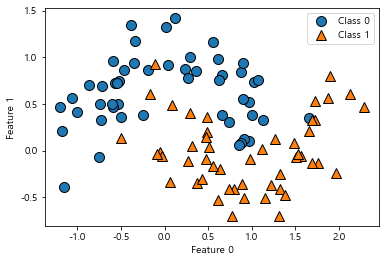

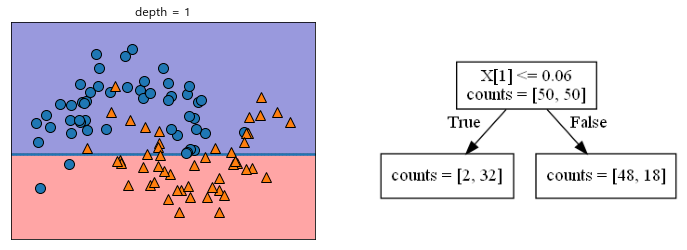

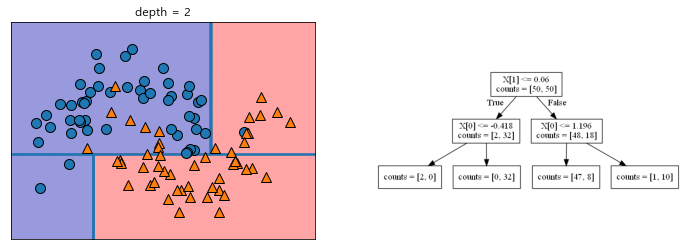

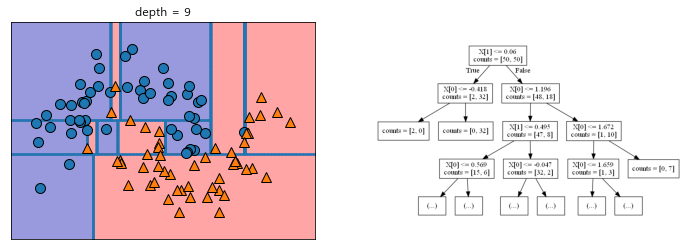

In [5]:
mglearn.plots.plot_tree_progressive()

### (1) 간단한 예

In [10]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,
                                                   random_state=11)

dt_clf = DecisionTreeClassifier(random_state=155).fit(X_train, y_train)

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

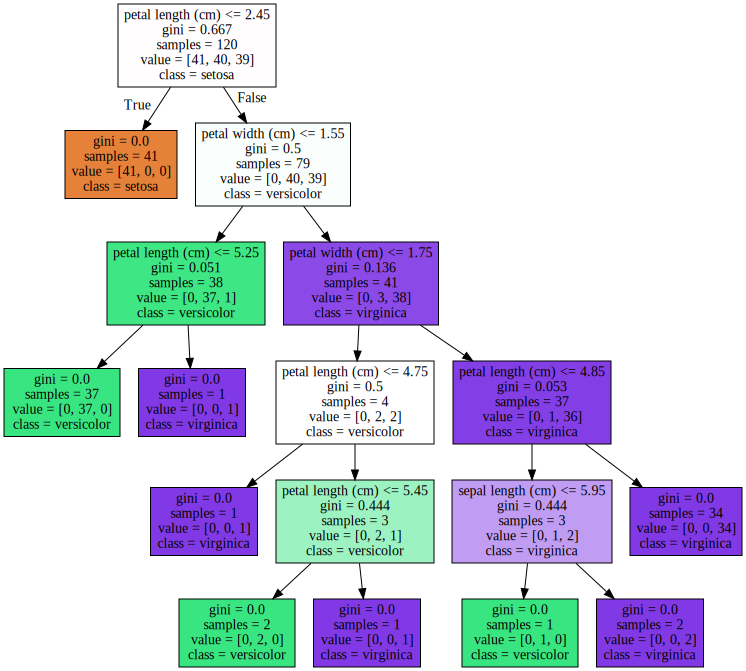

In [20]:
import graphviz 

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

In [14]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.8666666666666667


### (2) 과적합 해소를 위한 복잡도 제어 : Prunning(가지치기)

+ 종류
    - 사전 가지치기
    - 사후 가지치기
    - sklearn에서는 사후 가지치기만 지원
    

+ 파라미터
    - min_samples_split
    - min_samples_leaf
    - max_features
    - max_depth
    - max_leaf_nodes

In [15]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,
                                                   random_state=11)

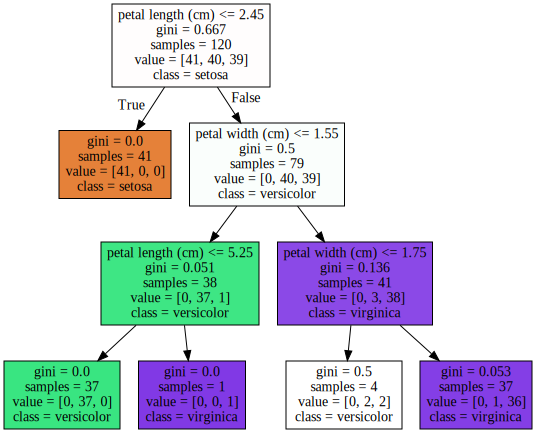

In [17]:
##### max_depth
dt_clf = DecisionTreeClassifier(random_state=155, max_depth=3).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

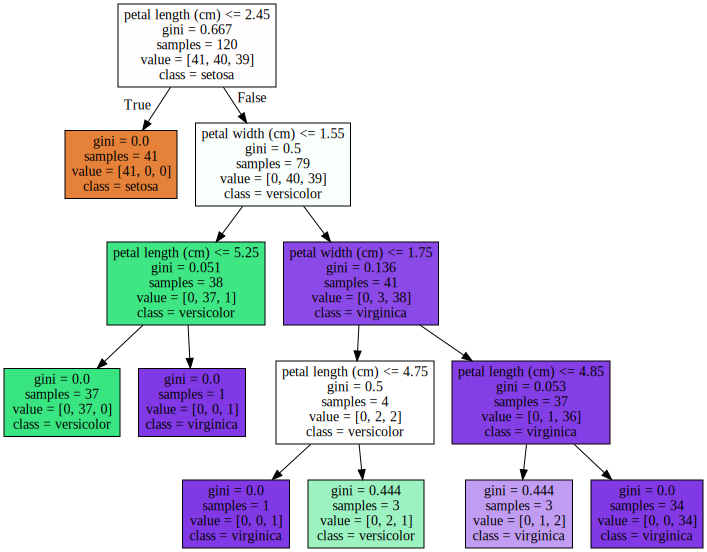

In [18]:
##### min_samples_split : 분할하기 위한 최소한의 샘플 수
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_split=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

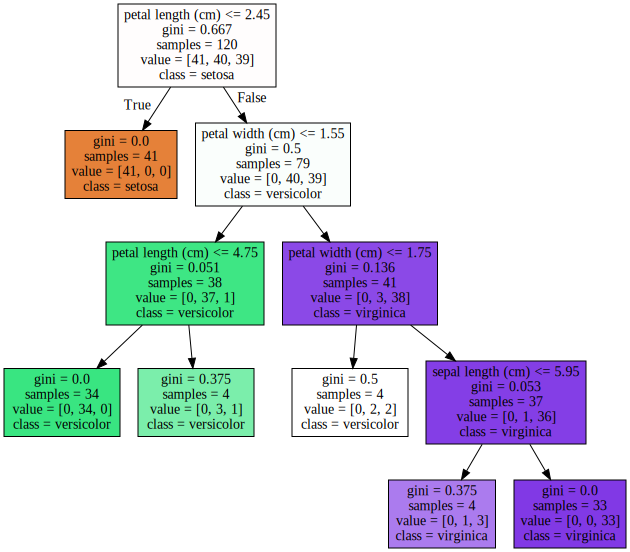

In [19]:
##### min_samples_leaf : 리프노드가 되기위한 최소한의 샘플 수
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

export_graphviz(dt_clf, out_file="data/tree.dot", class_names=iris.target_names,
               feature_names = iris.feature_names, filled=True)

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

### (3) 성능 개선

#### 1) 특성 중요도

##### iris sample

In [47]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,
                                                    random_state=11)

dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train, y_train)

In [48]:
print("훈련 정확도 : ", dt_clf.score(X_train, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test, y_test))

훈련 정확도 :  0.9666666666666667
테스트 정확도 :  0.9333333333333333


In [37]:
dir(dt_clf)
print(dt_clf.feature_importances_)
print(iris.feature_names)

[0.01667014 0.         0.56323788 0.42009198]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [38]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(name, value)

sepal length (cm) 0.01667013961241925
sepal width (cm) 0.0
petal length (cm) 0.5632378847375198
petal width (cm) 0.42009197565006084


<AxesSubplot:>

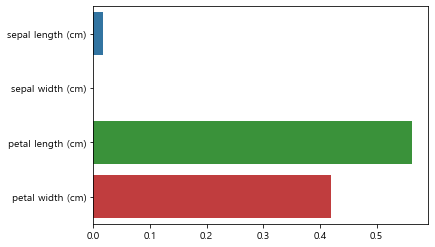

In [39]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

##### breast_cancer sample

In [28]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                   random_state=42)

In [29]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

In [30]:
print("훈련 정확도 : ", tree.score(X_train, y_train))
print("테스트 정확도 : ", tree.score(X_test, y_test))

훈련 정확도 :  0.9882629107981221
테스트 정확도 :  0.951048951048951


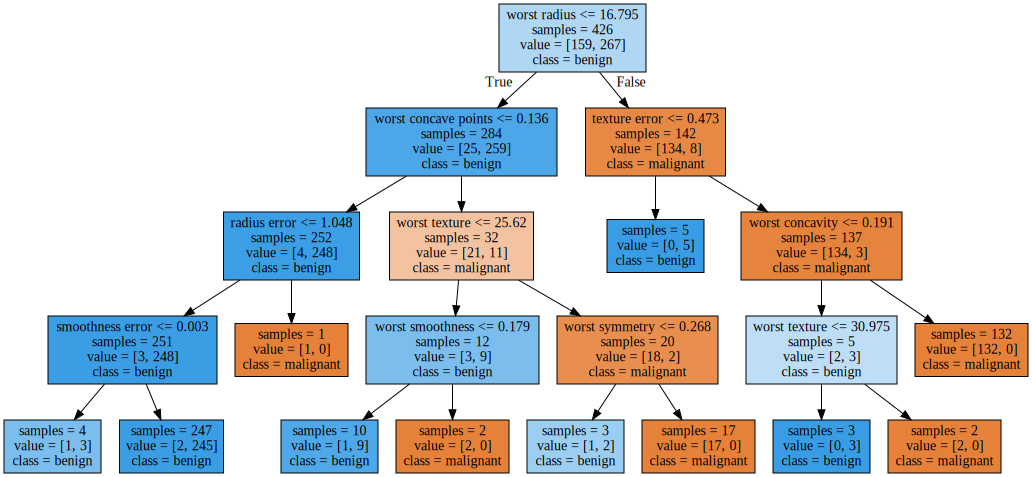

In [31]:
export_graphviz(tree, out_file="data/tree.dot", class_names=cancer.target_names,
               feature_names = cancer.feature_names, filled=True, impurity=False)

f = open("data/tree.dot")
dot_graph = f.read()

graphviz.Source(dot_graph)

In [34]:
# print(tree.feature_importances_)
# print(cancer.feature_names)
for name, value in zip(cancer.feature_names, tree.feature_importances_):
    print(name, value)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


<AxesSubplot:>

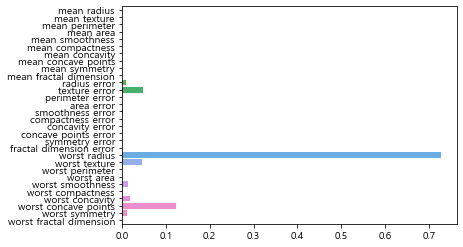

In [35]:
sns.barplot(x=tree.feature_importances_, y=cancer.feature_names)

#### 2) 특성 중요도를 통해 추출한 특성만을 사용했을 때 성능 개선 효과

In [58]:
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [60]:
dt_clf = DecisionTreeClassifier(random_state=155, min_samples_leaf=4).fit(X_train_std, y_train)

print("훈련 정확도 : ", dt_clf.score(X_train_std, y_train))
print("테스트 정확도 : ", dt_clf.score(X_test_std, y_test))

훈련 정확도 :  0.9821428571428571
테스트 정확도 :  0.9736842105263158


### (4) 사례1 : 서울 지역 동 분류

+ 서울 지역(구)의 경도와 위도를 사용해서 임의로 입력된 지역(동)을 강동, 강서, 강남, 강북으로 분류

In [61]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [62]:
train_df = pd.DataFrame(district_dict_list)
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [63]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [64]:
test_df = pd.DataFrame(dong_dict_list)
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [65]:
##### 현재 가지고 있는 데이터에서 레이블의 갯수 확인
print(train_df.label.value_counts())
print(test_df.label.value_counts())

Gangbuk     5
Gangdong    5
Gangseo     5
Gangnam     5
Name: label, dtype: int64
Gangbuk     5
Gangdong    5
Gangseo     5
Gangnam     5
Name: label, dtype: int64


C:\Users\acorn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


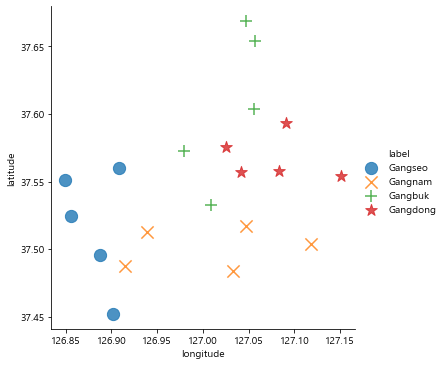

In [69]:
##### 데이터 시각화

sns.lmplot("longitude", "latitude", data=train_df, fit_reg=False,
          markers=["o", "x", "+", "*"], hue="label", scatter_kws={"s":150})

In [70]:
##### 구 이름과 동 이름을 삭제

train_df.drop(["district"], axis=1, inplace=True)
test_df.drop(["dong"], axis=1, inplace=True)

In [72]:
train_df
test_df

,latitude,longitude,label
0,37.489853,126.854547,Gangseo
1,37.501394,126.859245,Gangseo
2,37.537759,126.847951,Gangseo
3,37.575817,126.815719,Gangseo
4,37.577039,126.891620,Gangseo
5,37.508838,127.030720,Gangnam
6,37.501163,127.057193,Gangnam
7,37.486401,127.018281,Gangnam
8,37.483279,126.988194,Gangnam
9,37.492896,127.043159,Gangnam


In [89]:
X_train = train_df[["latitude", "longitude"]]
y_train = train_df["label"]

X_test = test_df[["latitude", "longitude"]]
y_test = test_df["label"]

In [90]:
##### Label값을 숫자로 변환

le = LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode

array([3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [91]:
clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_encode)

In [92]:
def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, \
                   edgecolor="black", s=200)
    
    plt.title("Decision surface of a dicision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)
    plt.xlabel("longitude", fontsize=16)
    plt.ylabel("latitude", fontsize=16)
    plt.show()

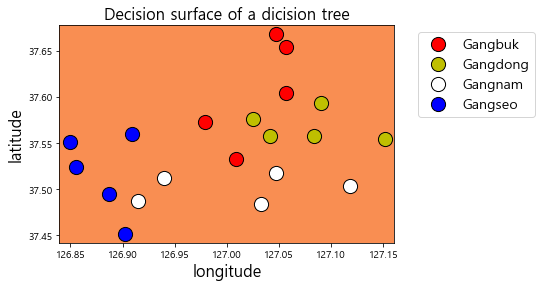

In [93]:
display_decision_surface(clf, X_train, y_encode)

In [94]:
pred = clf.predict(X_test)
print("정확도 : ", accuracy_score(y_test.values, le.classes_[pred]))

정확도 :  1.0


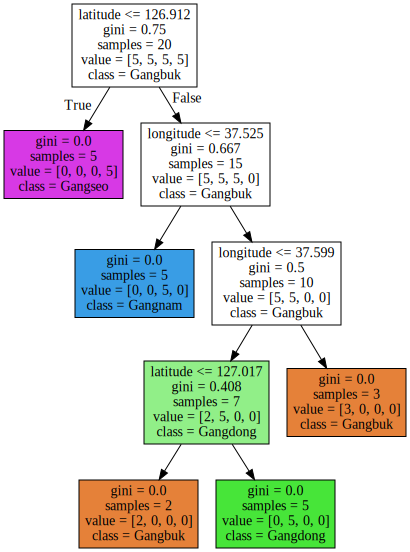

In [97]:
graph = export_graphviz(clf, out_file=None, class_names=["Gangbuk", "Gangdong", "Gangnam", "Gangseo"],
               feature_names = ["longitude", "latitude"], filled=True, impurity=True)

graphviz.Source(graph)

# 2. RandomForest

#### 앙상블(Ensemble)
    - vote 방식
        - Soft Voting
        - Hard Voting
        
        
    - 종류
        - Voting
            - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
            - 같은 데이터셋에서 서로 다른 알고리즘을 가진 분류기를 결합
            
            
        - Bagging
            - 서로 다른 샘플 데이터에서 각각의 분류기가 모두 같은 유형의 알고리즘 기반
            - RandomForest
            
            
        - Boosting
            - 여러 개의 분류기가 순차적으로 학습을 하되  앞에서 학습한 분류기가 틀린 데이터에서 대해서 올바르게 예측할 수 있도록 다음 분류기에서 가중치를 부여
            - Gradient Boosting
            - XGBoost, Light GBM, Stacking, ...

In [101]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [106]:
forest = RandomForestClassifier(random_state=2, n_estimators=5).fit(X_train, y_train)

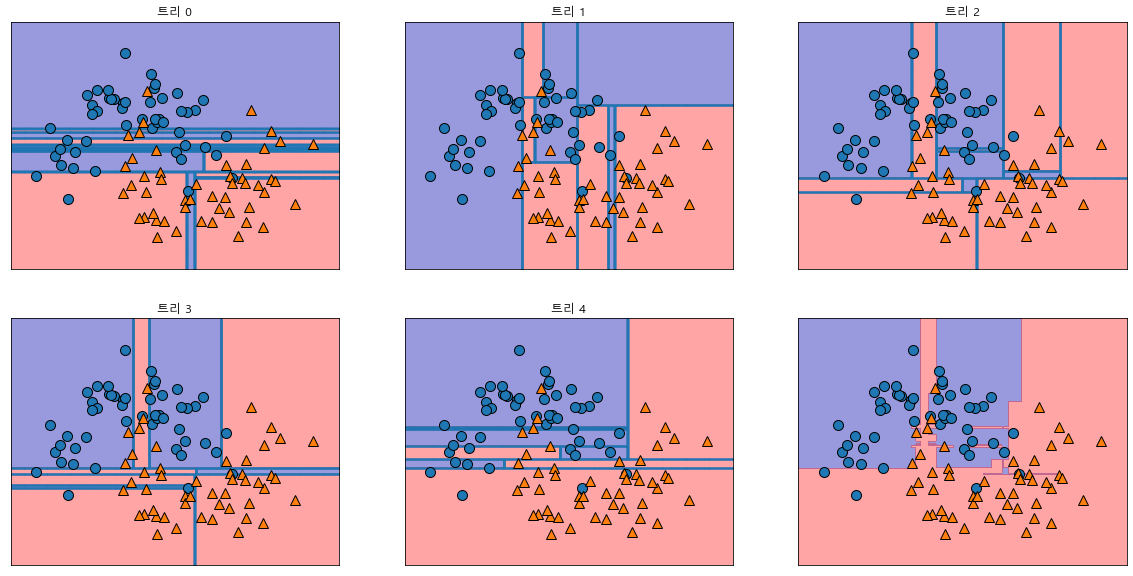

In [110]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

### (1) DecisionTree vs. RandomForest

In [111]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [113]:
model1 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.76


In [114]:
model1 = RandomForestClassifier(random_state=0, n_estimators=5).fit(X_train, y_train)

print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  0.9866666666666667
테스트 정확도 :  0.88


---

In [115]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [117]:
model1 = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)

print("훈련 정확도 : ", model1.score(X_train, y_train))
print("테스트 정확도 : ", model1.score(X_test, y_test))

훈련 정확도 :  0.9765258215962441
테스트 정확도 :  0.9370629370629371


<AxesSubplot:>

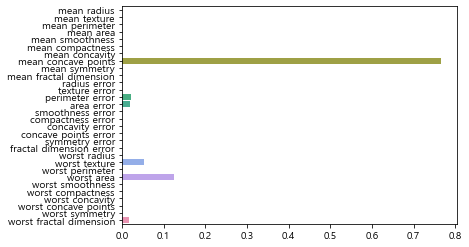

In [118]:
sns.barplot(x=model1.feature_importances_, y=cancer.feature_names)

In [119]:
model2 = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)

print("훈련 정확도 : ", model2.score(X_train, y_train))
print("테스트 정확도 : ", model2.score(X_test, y_test))

훈련 정확도 :  1.0
테스트 정확도 :  0.972027972027972


<AxesSubplot:>

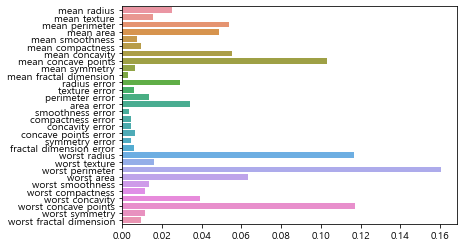

In [120]:
sns.barplot(x=model2.feature_importances_, y=cancer.feature_names)

---

In [123]:
mnist = load_digits()
print(mnist.data.shape)
mnist.target

(1797, 64)


array([0, 1, 2, ..., 8, 9, 8])

In [124]:
X, y = mnist.data, mnist.target

In [127]:
##### 교차 검증을 위한 공용 함수

def cross_validation(clf, features, labels):
    cv_scores = []
    
    for i in range(10):
        scores = cross_val_score(clf, features, labels, cv=10, scoring="accuracy")
        cv_scores.append(scores.mean())
        
    return cv_scores

In [128]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(), X, y)
rf_cv_scores = cross_validation(RandomForestClassifier(), X, y)

In [132]:
print(np.mean(dt_cv_scores))
print(np.mean(rf_cv_scores))

0.8249065797641215
0.9504652389819988


<AxesSubplot:>

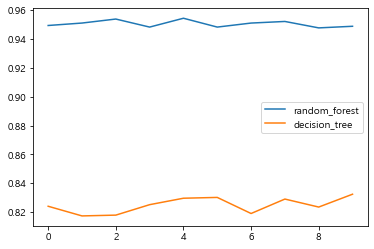

In [135]:
df = pd.DataFrame({"random_forest":rf_cv_scores, "decision_tree":dt_cv_scores})
df
df.plot()

### (2) 사례 : 독버섯 데이터

+ https://archive.ics.uci.edu/ml/datasets/mushroom
    - agaricus-lepiota.data
    
    
+ 파일명을 "mushrooms.csv"로 변경

In [136]:
import urllib.request as req

savedir = "data/mushrooms1.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
req.urlretrieve(url, savedir)
print("다운로드 완료")

다운로드 완료
